# **EDA방법론 세션 이후 과제(~230120)**
노선별 t-test 진행(9월 vs. 11월)
EDA 5조 이성균

### **13145 연세로.명물거리(세브란스병원 방면) (타코벨 앞)**
171, 172, 173, 472, 674, 700, 7024, 서대문03, 서대문04, 서대문05
### **13146 연세로.스타광장(현대백화점 방면) (유플렉스 앞)**
7720, 7727, 7728, 72, 75
### **13324 연세로.문학의거리(연세로.명물거리 방면) (playground 앞)**
171, 172, 173, 472, 674, 700, 7024


차 없는 거리 : 2014년 1월 연세로가 서울시 첫 대중교통전용지구로 지정됨, 왕복 4차로를 2차로로 줄이고 인도 확장. 2018년 4월부터는 금요일 오후 2시부터 버스도 금지해 완전히 차 없는 거리로 만듦(더불어민주당 문석진 전 서대문구청장)

차 없는 거리 해제 : 국민의힘 이성헌 현 서대문구청장 취임(2022.07.01.) 이후, 2022년 10월 9일 오후 10시부터 주말에도 버스 통행 가능, 2023년 1월 20일부터 9월 30일까지 대중교통전용지구 해제 시범운영 및 24시간 전일 차량 통행 가능

전후 변화 : 2022년 10월 9일 전후 13145, 13324 승하차인원 추이 비교 - 9월과 11월의 승차인원 평균이 차이가 있는지 이표본 이분산 t-검정 수행

불리언 인덱싱, loc 함수를 통해 필요한 정보들만 뽑아내어 시각화하려고 시도함.

# **데이터전처리**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
B2212 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202212.csv', encoding = 'cp949')
B2211 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202211.csv', encoding = 'cp949')
B2210 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202210.csv', encoding = 'cp949')
B2209 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202209.csv', encoding = 'cp949')
B2208 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202208.csv', encoding = 'cp949')
B2207 = pd.read_csv('/content/drive/MyDrive/DSL_EDA/BUS_STATION_BOARDING_MONTH_202207.csv', encoding = 'cp949')

In [4]:
# 13145 정류장(타코벨 앞) 데이터프레임 만드는 함수
def DF13145(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13145']
  return tt

dflist_13145 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024', '서대문03', '서대문04', '서대문05']:
    dflist_13145.append(DF13145(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [5]:
len(dflist_13145)

60

In [6]:
# 13146 정류장(유플렉스 앞) 데이터프레임 만드는 함수
def DF13146(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13146']
  return tt

dflist_13146 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['7720', '7727', '7728', '72', '75']:
    dflist_13146.append(DF13146(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [7]:
len(dflist_13146)

30

In [8]:
# 13324 정류장(playground 앞) 데이터프레임 만드는 함수
def DF13324(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13324']
  return tt

dflist_13324 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024']:
    dflist_13324.append(DF13324(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [9]:
len(dflist_13324)

42

사용일자를 datetime 패키지 사용해서 요일 입력 후, 금~일 제외해서(차 없는 거리 : 금요일 오후 2시부터 일요일 자정까지) df 새로 생성

In [10]:
import datetime
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [11]:
#13145 정류장 정리

for k in range(0,len(dflist_13145)):
  date = []
  for i in range(0,len(dflist_13145[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13145[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13145[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13145[k] = dflist_13145[k][(dflist_13145[k]['요일']!='Fri')&(dflist_13145[k]['요일']!='Sat')&(dflist_13145[k]['요일']!='Sun')]

In [12]:
#13146 정류장 정리

for k in range(0,len(dflist_13146)):
  date = []
  for i in range(0,len(dflist_13146[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13146[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13146[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13146[k] = dflist_13146[k][(dflist_13146[k]['요일']!='Fri')&(dflist_13146[k]['요일']!='Sat')&(dflist_13146[k]['요일']!='Sun')]

In [13]:
#13324 정류장 정리

for k in range(0,len(dflist_13324)):
  date = []
  for i in range(0,len(dflist_13324[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13324[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13324[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13324[k] = dflist_13324[k][(dflist_13324[k]['요일']!='Fri')&(dflist_13324[k]['요일']!='Sat')&(dflist_13324[k]['요일']!='Sun')]

데이터프레임 만들기(추이 확인용)

In [14]:
# 데이터프레임 모아서 만들기 - 13145
Data_13145_171 = pd.concat([dflist_13145[0],dflist_13145[10],dflist_13145[20],dflist_13145[30],dflist_13145[40],dflist_13145[50]])
Data_13145_172 = pd.concat([dflist_13145[1],dflist_13145[11],dflist_13145[21],dflist_13145[31],dflist_13145[41],dflist_13145[51]])
Data_13145_173 = pd.concat([dflist_13145[2],dflist_13145[12],dflist_13145[22],dflist_13145[32],dflist_13145[42],dflist_13145[52]])
Data_13145_472 = pd.concat([dflist_13145[3],dflist_13145[13],dflist_13145[23],dflist_13145[33],dflist_13145[43],dflist_13145[53]])
Data_13145_674 = pd.concat([dflist_13145[4],dflist_13145[14],dflist_13145[24],dflist_13145[34],dflist_13145[44],dflist_13145[54]])
Data_13145_700 = pd.concat([dflist_13145[5],dflist_13145[15],dflist_13145[25],dflist_13145[35],dflist_13145[45],dflist_13145[55]])
Data_13145_7024 = pd.concat([dflist_13145[6],dflist_13145[16],dflist_13145[26],dflist_13145[36],dflist_13145[46],dflist_13145[56]])
Data_13145_S03 = pd.concat([dflist_13145[7],dflist_13145[17],dflist_13145[27],dflist_13145[37],dflist_13145[47],dflist_13145[57]])
Data_13145_S04 = pd.concat([dflist_13145[8],dflist_13145[18],dflist_13145[28],dflist_13145[38],dflist_13145[48],dflist_13145[58]])
Data_13145_S05 = pd.concat([dflist_13145[9],dflist_13145[19],dflist_13145[29],dflist_13145[39],dflist_13145[49],dflist_13145[59]])

In [15]:
# 데이터프레임 모아서 만들기 - 13146
Data_13146_7720 = pd.concat([dflist_13146[0],dflist_13146[5],dflist_13146[10],dflist_13146[15],dflist_13146[20],dflist_13146[25]])
Data_13146_7727 = pd.concat([dflist_13146[1],dflist_13146[6],dflist_13146[11],dflist_13146[16],dflist_13146[21],dflist_13146[26]])
Data_13146_7728 = pd.concat([dflist_13146[2],dflist_13146[7],dflist_13146[12],dflist_13146[17],dflist_13146[22],dflist_13146[27]])
Data_13146_72 = pd.concat([dflist_13146[3],dflist_13146[8],dflist_13146[13],dflist_13146[18],dflist_13146[23],dflist_13146[28]])
Data_13146_75 = pd.concat([dflist_13146[4],dflist_13146[9],dflist_13146[14],dflist_13146[19],dflist_13146[24],dflist_13146[29]])

In [16]:
# 데이터프레임 모아서 만들기 - 13324
Data_13324_171 = pd.concat([dflist_13324[0],dflist_13324[7],dflist_13324[14],dflist_13324[21],dflist_13324[28],dflist_13324[35]])
Data_13324_172 = pd.concat([dflist_13324[1],dflist_13324[8],dflist_13324[15],dflist_13324[22],dflist_13324[29],dflist_13324[36]])
Data_13324_173 = pd.concat([dflist_13324[2],dflist_13324[9],dflist_13324[16],dflist_13324[23],dflist_13324[30],dflist_13324[37]])
Data_13324_472 = pd.concat([dflist_13324[3],dflist_13324[10],dflist_13324[17],dflist_13324[24],dflist_13324[31],dflist_13324[38]])
Data_13324_674 = pd.concat([dflist_13324[4],dflist_13324[11],dflist_13324[18],dflist_13324[25],dflist_13324[32],dflist_13324[39]])
Data_13324_700 = pd.concat([dflist_13324[5],dflist_13324[12],dflist_13324[19],dflist_13324[26],dflist_13324[33],dflist_13324[40]])
Data_13324_7024 = pd.concat([dflist_13324[6],dflist_13324[13],dflist_13324[20],dflist_13324[27],dflist_13324[34],dflist_13324[41]])

# **이용객 추이 시각화**

## **13145 정류장**

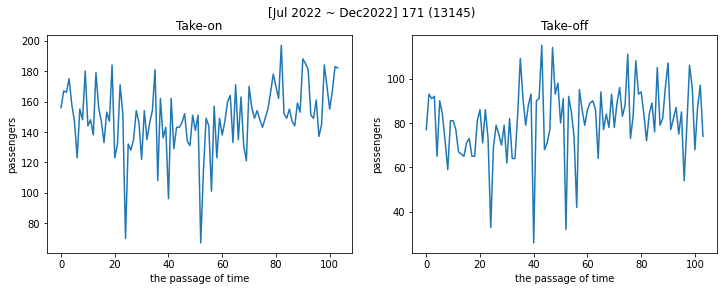

In [21]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_171['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_171['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 171 (13145)')

plt.show()

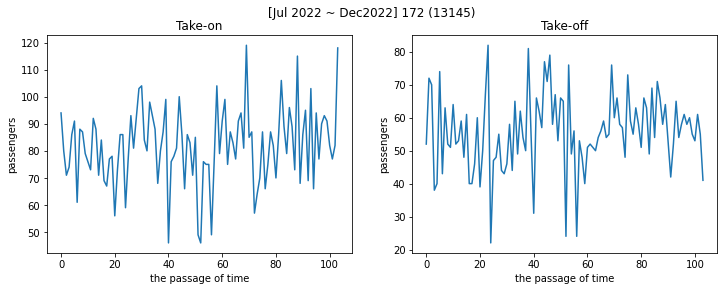

In [22]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_172['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_172['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 172 (13145)')
plt.show()

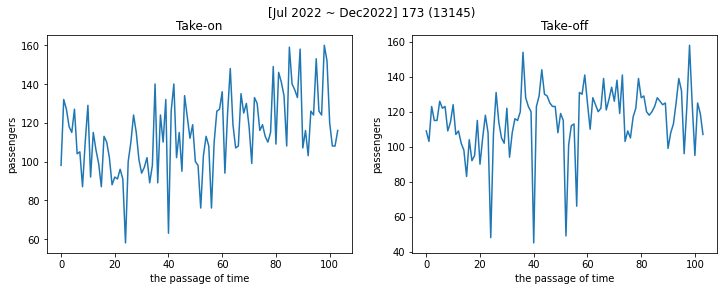

In [23]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_173['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_173['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 173 (13145)')

plt.show()

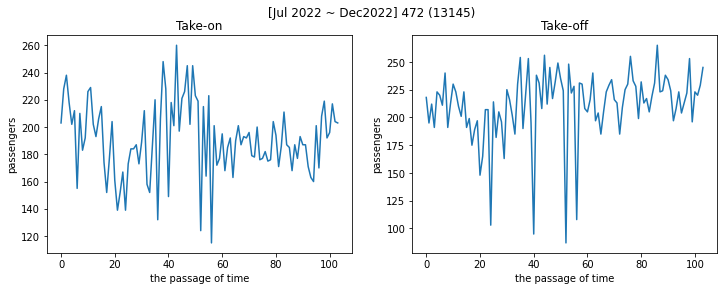

In [24]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_472['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_472['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 472 (13145)')

plt.show()

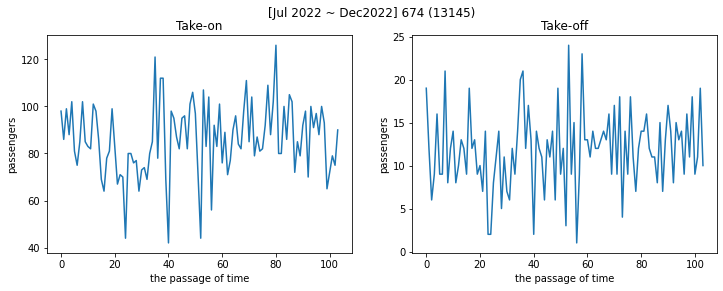

In [25]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_674['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_674['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 674 (13145)')

plt.show()

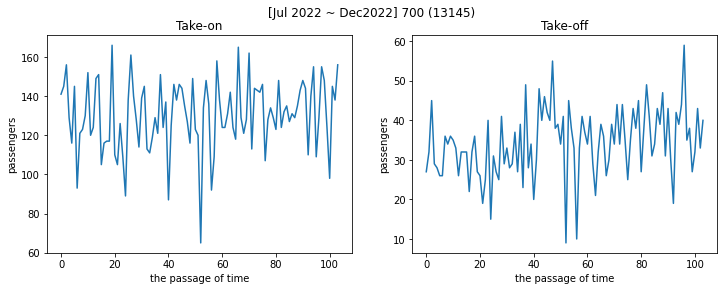

In [26]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_700['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_700['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 700 (13145)')
plt.show()

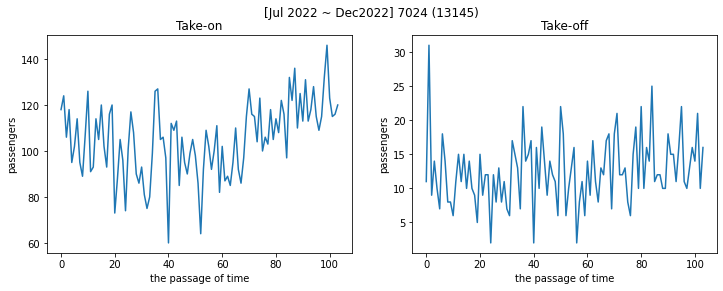

In [27]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_7024['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_7024['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 7024 (13145)')
plt.show()

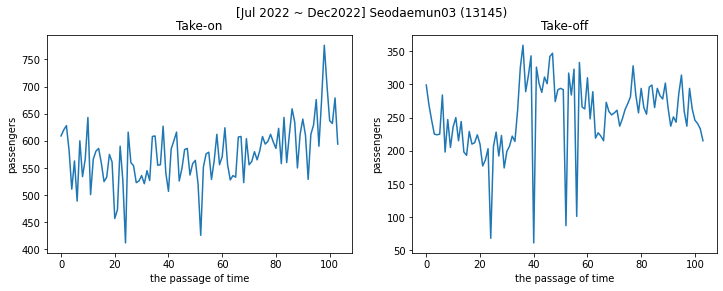

In [28]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_S03['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_S03['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] Seodaemun03 (13145)')

plt.show()

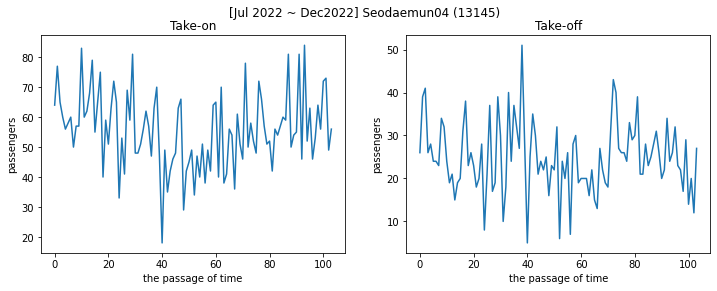

In [29]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_S04['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_S04['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] Seodaemun04 (13145)')

plt.show()

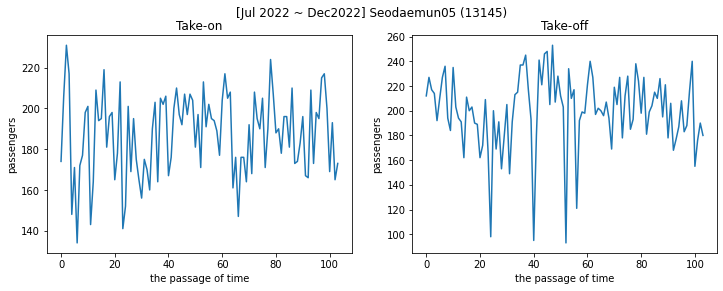

In [30]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13145_S05['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13145_S05['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] Seodaemun05 (13145)')

plt.show()

## **13146 정류장**

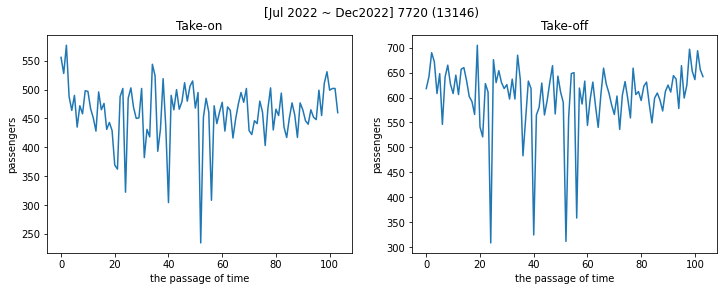

In [31]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13146_7720['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13146_7720['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 7720 (13146)')

plt.show()

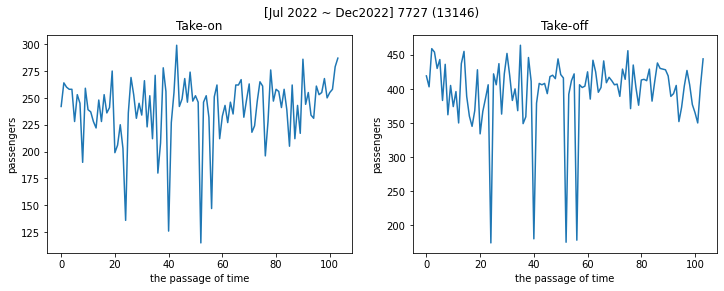

In [32]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13146_7727['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13146_7727['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 7727 (13146)')

plt.show()

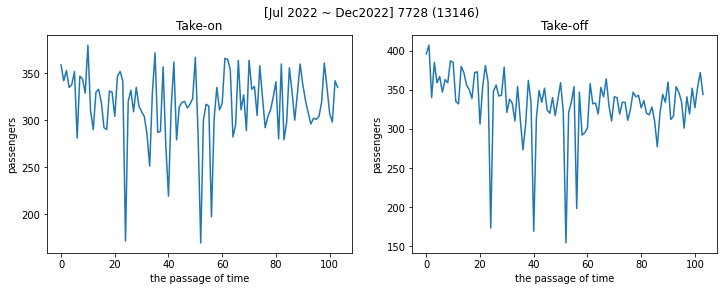

In [33]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13146_7728['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13146_7728['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 7728 (13146)')

plt.show()

72번과 75번은 모두 고양시 버스.  
72번은 하루 6회, 75번은 평일 7회 / 주말 9회 운행  
따라서 서울시 데이터에서는 찾을 수 없고, 경기버스시스템에서 운행 정보를 찾아야 하는데 하루 운행수가 너무 적어서(배차간격 최대 3시간) 데이터를 조회할 수 없음.

## **13324 정류장**

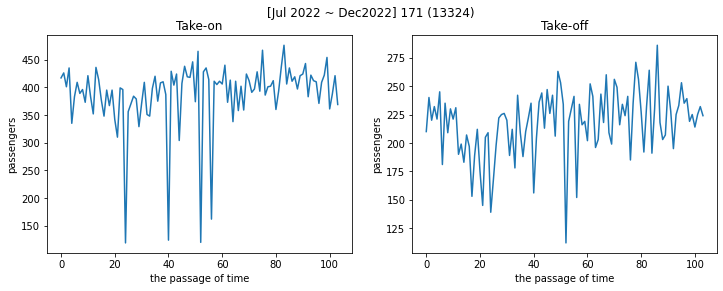

In [34]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13324_171['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13324_171['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 171 (13324)')

plt.show()

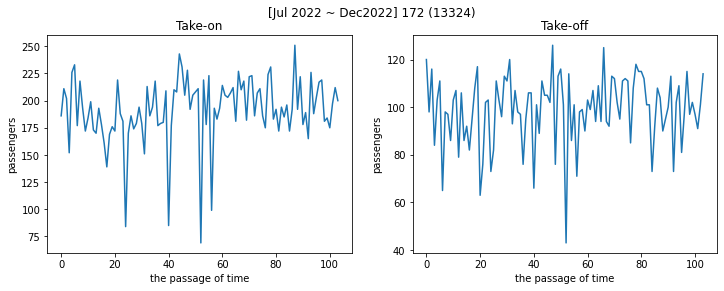

In [35]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13324_172['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13324_172['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 172 (13324)')

plt.show()

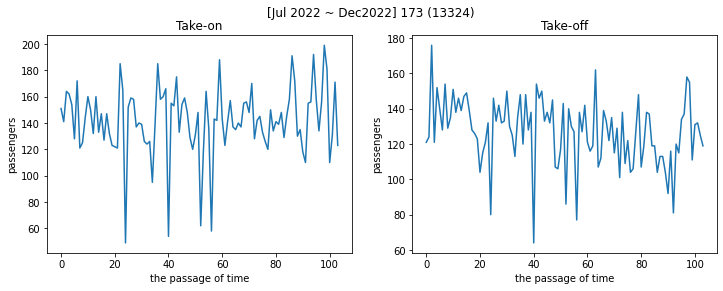

In [36]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13324_173['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13324_173['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 173 (13324)')

plt.show()

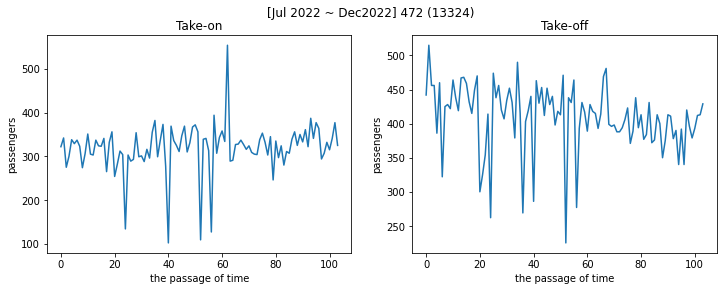

In [37]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13324_472['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13324_472['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 472 (13324)')

plt.show()

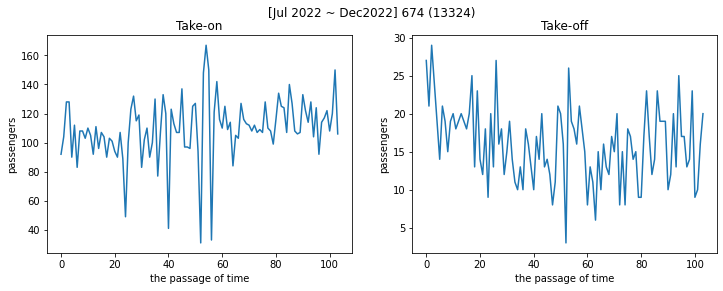

In [38]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13324_674['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13324_674['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 674 (13324)')

plt.show()

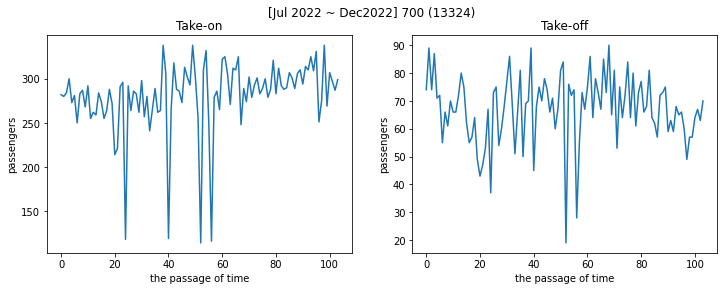

In [39]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13324_700['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13324_700['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 700 (13324)')

plt.show()

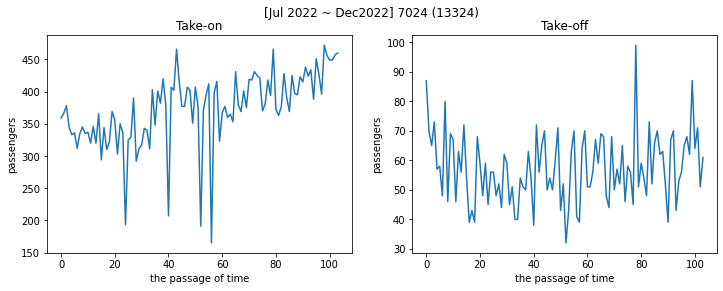

In [40]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(Data_13324_7024['승차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-on')

plt.subplot(1, 2, 2)
plt.plot(list(Data_13324_7024['하차총승객수']))
plt.xlabel("the passage of time") # x축 라벨 설정
plt.ylabel("passengers") # y축 라벨 설정
plt.title('Take-off')

fig.suptitle('[Jul 2022 ~ Dec2022] 7024 (13324)')

plt.show()

# **T-Test (9월평균<11월평균 검정, 유의수준 0.05)**
시각화 목표:  
1) 모든 노선 이용객수 추이(7월~12월)  
2) t-검정 후 유의수준 0.05 넘는지 안넘는지에 따라 Heatmap 그리기

In [41]:
from scipy import stats

## **13145 정류장**

In [67]:
t_13145_takeon = []
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+20]['승차총승객수'],
                                    equal_var=False, alternative="less")
  t_13145_takeon.append(p_value)
t_13145_takeon

[0.009936789348169703,
 0.17301351423785566,
 0.02371726986716882,
 0.9985482758308224,
 0.26580150260063967,
 0.2974943134984972,
 0.005256649293290834,
 0.006804979968439611,
 0.023211857939169744,
 0.7316745090133058]

In [68]:
t_13145_takeoff = []
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+20]['하차총승객수'],
                                    equal_var=False, alternative="less")
  t_13145_takeoff.append(p_value)
t_13145_takeoff

[0.35518509301270607,
 0.6227885195011759,
 0.3568332295928345,
 0.4295685560480337,
 0.6465018598321366,
 0.5406279614984912,
 0.38680497492426225,
 0.9225035711073559,
 0.34375471568222826,
 0.8198717977155725]

## **13146 정류장**

In [69]:
t_13146_takeon = []
for i in range(10,15):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+10]['승차총승객수'],
                                    equal_var=False, alternative="less")
  t_13146_takeon.append(p_value)
t_13146_takeon

[0.43817713587686535,
 0.7807211704498813,
 0.009603593567682311,
 4.999494323764576e-05,
 0.0024555796531708866]

In [70]:
t_13146_takeoff = []
for i in range(10,15):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+10]['하차총승객수'],
                                    equal_var=False, alternative="less")
  t_13146_takeoff.append(p_value)
t_13146_takeoff

[0.006957037370316274,
 0.002969129571874814,
 0.010292878418627341,
 0.005736658185704159,
 0.04657055997880737]

## **13324 정류장**

In [71]:
t_13324_takeon = []
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+14]['승차총승객수'],
                                    equal_var=False, alternative="less")
  t_13324_takeon.append(p_value)
t_13324_takeon

[0.9999998229899965,
 2.6882033470769896e-14,
 1.3266937473308896e-06,
 1.0,
 6.391828068315148e-11,
 0.434266923128252,
 0.9999999998839323]

In [72]:
t_13324_takeoff = []
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+14]['하차총승객수'],
                                    equal_var=False, alternative="less")
  t_13324_takeoff.append(p_value)
t_13324_takeoff

[6.312085775402079e-07,
 1.4314173560113113e-13,
 5.3969214799698825e-12,
 0.9999999999999607,
 1.826726366581278e-12,
 0.04291943582258167,
 0.9999999999895958]

# **t-test 결과 시각화**

## **13145 정류장**

row : 승차/하차   
column : 171, 172, 173, 472, 674, 700, 7024, 서대문03, 서대문04, 서대문05    
데이터 : t_13145_takeon / t_13145_takeoff

In [73]:
heatmap_13145 = pd.DataFrame({'171' : [t_13145_takeon[0], t_13145_takeoff[0]],
                             '172' : [t_13145_takeon[1], t_13145_takeoff[1]],
                             '173' : [t_13145_takeon[2], t_13145_takeoff[2]],
                             '472' : [t_13145_takeon[3], t_13145_takeoff[3]],
                             '674' : [t_13145_takeon[4], t_13145_takeoff[4]],
                             '700' : [t_13145_takeon[5], t_13145_takeoff[5]],
                             '7024' : [t_13145_takeon[6], t_13145_takeoff[6]],
                             'S03' : [t_13145_takeon[7], t_13145_takeoff[7]],
                             'S04' : [t_13145_takeon[8], t_13145_takeoff[8]],
                             'S05' : [t_13145_takeon[9], t_13145_takeoff[9]]},
                              index = ['take-on', 'take-off'])
heatmap_13145

,171,172,173,472,674,700,7024,S03,S04,S05
take-on,0.009937,0.173014,0.023717,0.998548,0.265802,0.297494,0.005257,0.006805,0.023212,0.731675
take-off,0.355185,0.622789,0.356833,0.429569,0.646502,0.540628,0.386805,0.922504,0.343755,0.819872


In [74]:
# function for set text color of positive
# values in Dataframes
def color_positive_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for positive
    strings, black otherwise.
    """
    if 0.025 <= val < 0.05:
        color = 'salmon'
    elif val < 0.025:
        color = 'darkred'
    else:
        color = 'black'
    return 'color: %s' % color
 
heatmap_13145.style.applymap(color_positive_red)

,171,172,173,472,674,700,7024,S03,S04,S05
take-on,0.009937,0.173014,0.023717,0.998548,0.265802,0.297494,0.005257,0.006805,0.023212,0.731675
take-off,0.355185,0.622789,0.356833,0.429569,0.646502,0.540628,0.386805,0.922504,0.343755,0.819872


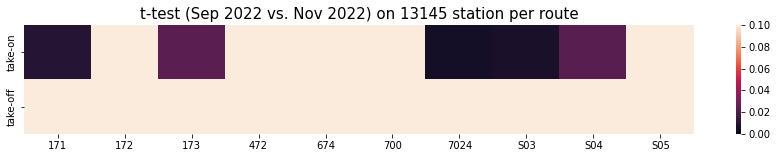

In [86]:
plt.figure(figsize = (15, 2))
sns.heatmap(heatmap_13145, annot = False, vmin=0, vmax=0.1)
plt.title("t-test (Sep 2022 vs. Nov 2022) on 13145 station per route", fontsize = 15)
plt.show()

## **13146 정류장**

row : 승차/하차   
column : 7720, 7727, 7728, 72, 75  
데이터 : t_13146_takeon / t_13146_takeoff

In [95]:
heatmap_13146 = pd.DataFrame({'7720' : [t_13146_takeon[0], t_13146_takeoff[0]],
                             '7727' : [t_13146_takeon[1], t_13146_takeoff[1]],
                             '7728' : [t_13146_takeon[2], t_13146_takeoff[2]]},
                              index = ['take-on', 'take-off'])
heatmap_13146

,7720,7727,7728
take-on,0.438177,0.780721,0.009604
take-off,0.006957,0.002969,0.010293


In [96]:
heatmap_13146.style.applymap(color_positive_red)

,7720,7727,7728
take-on,0.438177,0.780721,0.009604
take-off,0.006957,0.002969,0.010293


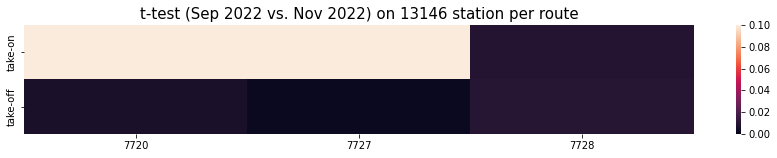

In [97]:
plt.figure(figsize = (15, 2))
sns.heatmap(heatmap_13146, annot = False, vmin=0, vmax=0.1)
plt.title("t-test (Sep 2022 vs. Nov 2022) on 13146 station per route", fontsize = 15)
plt.show()

## **13324 정류장**

row : 승차/하차   
column : 171, 172, 173, 472, 674, 700, 7024  
데이터 : t_13324_takeon / t_13324_takeoff


In [79]:
heatmap_13324 = pd.DataFrame({'171' : [t_13324_takeon[0], t_13324_takeoff[0]],
                             '172' : [t_13324_takeon[1], t_13324_takeoff[1]],
                             '173' : [t_13324_takeon[2], t_13324_takeoff[2]],
                             '472' : [t_13324_takeon[3], t_13324_takeoff[3]],
                             '674' : [t_13324_takeon[4], t_13324_takeoff[4]],
                              '700' : [t_13324_takeon[5], t_13324_takeoff[5]],
                              '7024' : [t_13324_takeon[6], t_13324_takeoff[6]]},
                              index = ['take-on', 'take-off'])
heatmap_13324

,171,172,173,472,674,700,7024
take-on,9.999998e-01,2.688203e-14,1.326694e-06,1.0,6.391828e-11,0.434267,1.0
take-off,6.312086e-07,1.431417e-13,5.396921e-12,1.0,1.826726e-12,0.042919,1.0


In [80]:
heatmap_13324.style.applymap(color_positive_red)

,171,172,173,472,674,700,7024
take-on,1.000000,0.000000,0.000001,1.000000,0.000000,0.434267,1.000000
take-off,0.000001,0.000000,0.000000,1.000000,0.000000,0.042919,1.000000


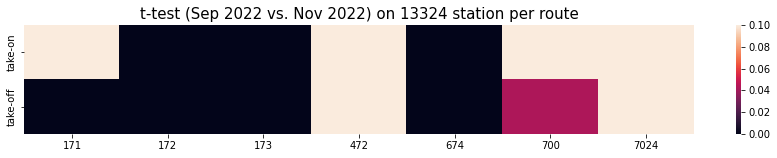

In [83]:
plt.figure(figsize = (15, 2))
sns.heatmap(heatmap_13324, annot = False, vmin=0, vmax=0.1)
plt.title("t-test (Sep 2022 vs. Nov 2022) on 13324 station per route", fontsize = 15)
plt.show()

# **결론:데이터부족**

(참고)  
간선버스 : 빠르게 도심을 잇는 목적, 직선구간 최대화  
지선버스 : 간선버스 또는 지하철 환승이 목적, 곡선구간이 많음 

<t-검정 결과>   
13145 정류장(연세대 방면) : 하차인원 모두 9월이 11월보다 많거나 같다.(귀무가설 모두 수용)  
13146 정류장(현대백화점 방면) : 하차인원 모두 9월보다 11월이 많거나 같다.(귀무가설 모두 기각)  
13324 정류장(연세대 방면) : 총 노선 중 차이O 5개, 차이X 2개  


### **해석**

<t-검정 결과>  
1. "13145 정류장의 9월 하차인원 평균은 11월 하차인원 평균보다 작거나 같다"는 귀무가설을 기각하지 못한다.  
2. "13146/13324 정류장의 9월 하차인원 평균은 11월 하차인원 평균보다 작거나 같다"는 귀무가설은 노선마다 다르나 기각하는 노선이 더 많다.

A. 이용객을 체크하려면 '하차인원'이 더 중요해보인다(버스를 타고 신촌으로 오는 사람들의 수).  
(13145 정류장과 13324 정류장은 마을버스 정차 유무이므로, 13324 정류장에서 먼저 많이 승객이 하차한다면(바로 맞은편이 유플렉스) 간선버스 승객은 유의미하다고 추론 가능)

B. 72번, 75번 버스의 경우 데이터를 조회하지 못해서 측정 및 검정이 불가능했고, 하루 운행횟수가 적어서 참고하기 어려웠을 것으로 예상된다.

C. 13145 정류장은 하차인원 차이가 무의미한데, 13146 및 13324 정류장에서 하차인원 차이가 유의미하다고 나온 결과에 대해 다음과 같은 추론이 가능하다.  
1) 두 정류장 모두 유플렉스 입구 바로 앞에 있는 정류장이므로, 하차한 인원이 모두 현대백화점 및 유플렉스를 이용하고자 한 사람들이라면, 차 없는 거리 해제가 상권 활성화에 도움을 주지 않았다고 판단할 수 있다.  
2) 특히 13146 정류장의 경우, 13145 정류장에 내릴 사람들이 13146 정류장에서 일괄 하차하였다면, 차 없는 거리 해제가 상권 활성화에 도움을 주었따고 판단할 수 있다.  
3) 그러나 통계적 검정과 별개로 하차 인원 및 승차 인원이 어느 곳으로 갔는지 자세히 알지 못하므로, 상권 활성화에 도움이 되었는지는 판단하기 어렵다.  

따라서 결과를 명확하게 판단하기 어렵다고 판단된다.  
그러나 버스를 통한 유동인구 추이가 어떻게 되는지 판단하고 실제로 상권 활성화에 영향을 주었는지는 사회적으로 주시하고 있는 이슈이므로 간단하게나마 검증을 시도해보았다는 것에 의의가 있다.